In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('Algerian_clean_data.csv')

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [10]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [44]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [12]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [13]:
## Encoding 
## we have to convert the string data in the form of binary data as input field is only two
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [14]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [15]:
## Independent and dependent features
x=df.drop('FWI',axis=1)
y=df['FWI']

In [16]:
## spliting the data into testing and training set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [17]:
X_train.shape ,X_test.shape

((182, 11), (61, 11))

In [18]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.322351,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.212946,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.170238,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.322351,0.212946,0.170238,1.000000,-0.496880,-0.253758,-0.268523,-0.301695,-0.264794,-0.279140,-0.326876,-0.033145
FFMC,0.676568,-0.644873,-0.166548,-0.496880,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.253758,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.268523,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.301695,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.264794,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.279140,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

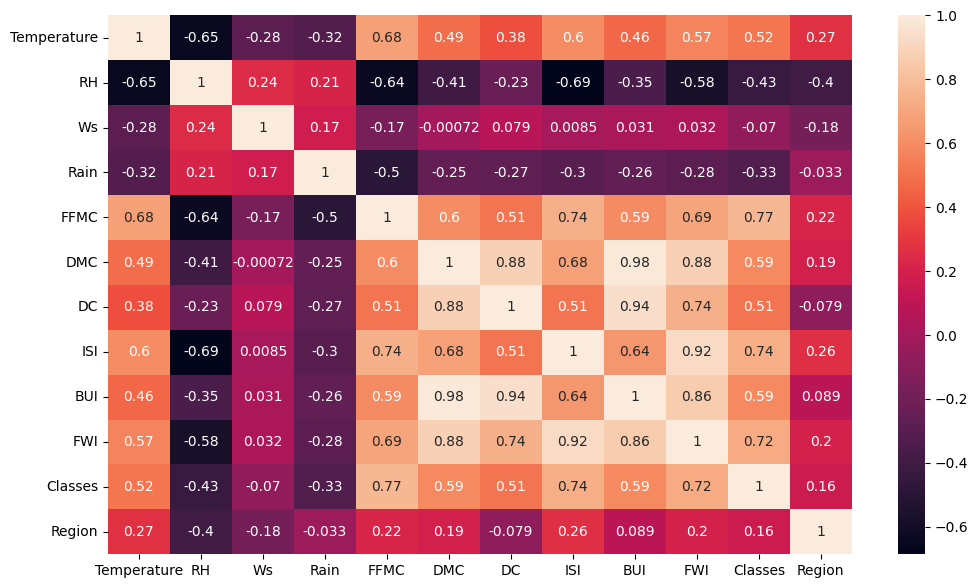

In [19]:
## Check  for multicollinearity
## correlation we always used heatmap to visualized it.. and it is present in the seaborn library
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

In [20]:
## In order remove the features that have multi-collinearity
def correlation(dataset,threshold):
    corr_df=dataset.corr()
    corr_set=set()
    for i in range(len(corr_df.columns)):
        for j in range(i):
            if abs(corr_df.iloc[i,j]) > threshold:
                col_name=corr_df.columns[i]
                corr_set.add(col_name)
    return corr_set           

In [24]:
## threshold will be decide  by domain expertise
corr_features=correlation(X_train,0.85)
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0,75.8,3.6,2.1,0,0
141,31,72,14,0,60.2,3.8,0.8,0,1
192,40,31,15,0,94.2,22.5,16.6,1,1
68,32,60,18,0,77.1,11.3,2.2,0,0
119,32,47,14,0,77.5,7.1,1.8,0,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0,44.9,0.9,0.2,0,0
14,28,80,17,3,49.4,3.0,0.4,0,0
92,25,76,17,7,46.0,1.3,0.2,0,0
179,34,59,16,0,88.1,19.5,7.4,1,1


In [26]:
## Now we have to standarised the X_train ,X_test
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



In [28]:
X_train.shape

(182, 9)

<Axes: >

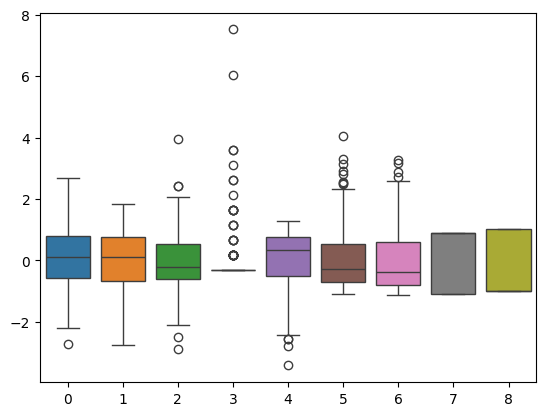

In [29]:
## let us visualized the effect of the scaling
sns.boxplot(X_train)
## all the features are scale such that the values of  each features try to be around 0

## Linear Regression Model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mean-absolute-Error",mae)
print("R2-score-value",score)

Mean-absolute-Error 0.5482687662881265
R2-score-value 0.9847332001053037


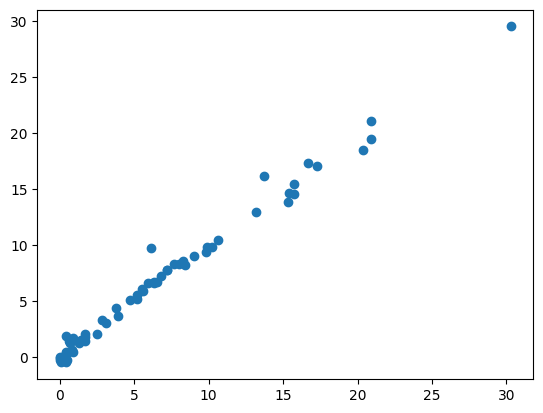

In [34]:
plt.scatter(Y_test,y_pred)

## Ridge Regression Model

In [35]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score

ridge=Ridge()
ridge.fit(X_train,Y_train)
y_pred=ridge.predict(X_test)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mean-absolute-Error",mae)
print("R2-score-value",score)

Mean-absolute-Error 0.5661066141448482
R2-score-value 0.9842679309696194


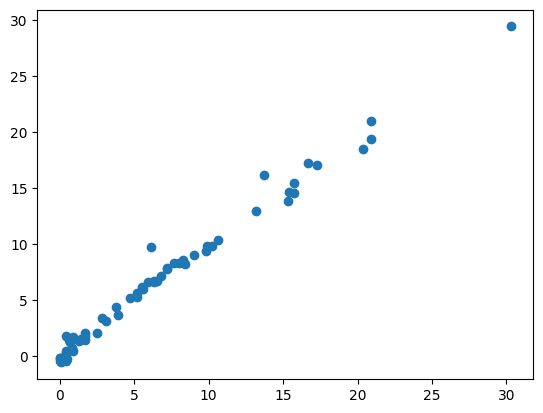

In [36]:
plt.scatter(Y_test,y_pred)

# Lasso Regression

In [38]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score

lasso=Lasso()
lasso.fit(X_train,Y_train)
y_pred=lasso.predict(X_test)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mean-absolute-Error",mae)
print("R2-score-value",score)

Mean-absolute-Error 1.1331759927078322
R2-score-value 0.9492020269788828


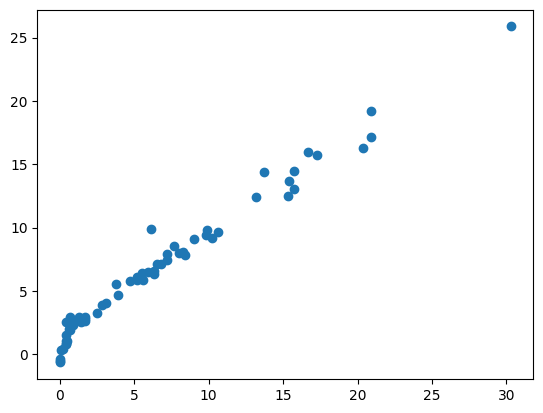

In [41]:
plt.scatter(Y_test,y_pred)

# Elasticnet Regression

In [42]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score

elastic=ElasticNet()
elastic.fit(X_train,Y_train)
y_pred=elastic.predict(X_test)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mean-absolute-Error",mae)
print("R2-score-value",score)

Mean-absolute-Error 1.882235754572662
R2-score-value 0.8753459839248137


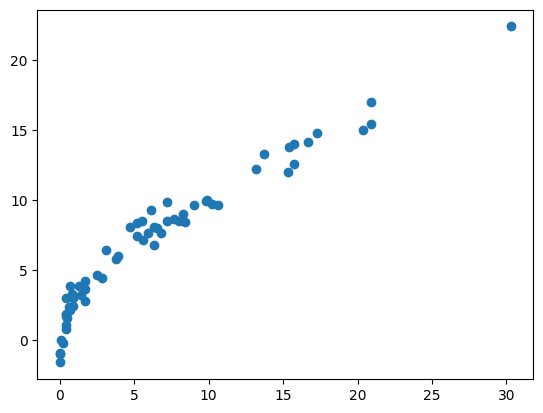

In [43]:
plt.scatter(Y_test,y_pred)

# Cross-Validation

In [46]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV()
help(LassoCV)

Help on class LassoCV in module sklearn.linear_model._coordinate_descent:

class LassoCV(sklearn.base.RegressorMixin, LinearModelCV)
 |  LassoCV(*, eps=0.001, n_alphas='deprecated', alphas='warn', fit_intercept=True, precompute='auto', max_iter=1000, tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=None, positive=False, random_state=None, selection='cyclic')
 |
 |  Lasso linear model with iterative fitting along a regularization path.
 |
 |  See glossary entry for :term:`cross-validation estimator`.
 |
 |  The best model is selected by cross-validation.
 |
 |  The optimization objective for Lasso is::
 |
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |
 |  Read more in the :ref:`User Guide <lasso>`.
 |
 |  Parameters
 |  ----------
 |  eps : float, default=1e-3
 |      Length of the path. ``eps=1e-3`` means that
 |      ``alpha_min / alpha_max = 1e-3``.
 |
 |  n_alphas : int, default=100
 |      Number of alphas along the regularization path.
 |
 |      .. dep